# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
# %pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# This might be helpful:
from collections import Counter
from iso3166 import countries

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)



(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [6]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'Poverty_Rates'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic Area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
print(df_hh_income.isna())
print(df_pct_poverty.isna())
print(df_pct_completed_hs.isna())
print(df_share_race_city.isna())
print(df_fatalities.isna())

       Geographic Area   City  Median Income
0                False  False          False
1                False  False          False
2                False  False          False
3                False  False          False
4                False  False          False
...                ...    ...            ...
29317            False  False           True
29318            False  False          False
29319            False  False          False
29320            False  False          False
29321            False  False           True

[29322 rows x 3 columns]
       Geographic Area   City  Poverty_Rates
0                False  False          False
1                False  False          False
2                False  False          False
3                False  False          False
4                False  False          False
...                ...    ...            ...
29324            False  False          False
29325            False  False          False
29326            False  False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [8]:
poverty_rates = []
states = []
for bruh,data in df_pct_poverty.iterrows():
    try:
        poverty_rates.append(float(data['Poverty_Rates']))
        states.append(data['Geographic Area'])
    except:
        poverty_rates.append(0)
        states.append(data['Geographic Area'])

data = {'Poverty': poverty_rates, "States": states}
poverty_dataframe = pd.DataFrame(data, columns=['Poverty', 'States'])
poverty_dataframe = poverty_dataframe.groupby(['States']).mean().reset_index()
poverty_dataframe  = poverty_dataframe.sort_values('Poverty', ascending=False)
poverty_dataframe

,States,Poverty
25,MS,26.88
3,AZ,25.27
10,GA,23.66
2,AR,22.96
32,NM,22.51
18,LA,22.29
40,SC,22.11
49,WV,21.08
1,AL,20.61
36,OK,20.55


In [9]:
bar = px.bar(x=poverty_dataframe['States'], y=poverty_dataframe['Poverty'], color=poverty_dataframe['Poverty'], color_continuous_scale='plasma')
bar.update_layout(xaxis_title = 'US State', yaxis_title = 'Average Poverty Rate', font_size=10.5)
bar.update_xaxes(tickangle=0)
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [10]:
highschool_rates = []
states = []
for bruh,data in df_pct_completed_hs.iterrows():
    try:
        highschool_rates.append(float(data['percent_completed_hs']))
        states.append(data['Geographic Area'])
    except:
        highschool_rates.append(0)
        states.append(data['Geographic Area'])

data = {'highschool': highschool_rates, "States": states}
highschool_dataframe = pd.DataFrame(data, columns=['highschool', 'States'])
highschool_dataframe = highschool_dataframe.groupby(['States']).mean().reset_index()
highschool_dataframe  = highschool_dataframe.sort_values('highschool', ascending=False)
bar = px.bar(x=highschool_dataframe['States'], y=highschool_dataframe['highschool'], color=highschool_dataframe['highschool'], color_continuous_scale='plasma')
bar.update_layout(xaxis_title = 'US State', yaxis_title = 'Average Highschool Passing Rate', font_size=10.5)
bar.update_xaxes(tickangle=0)
bar.show()


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [11]:
poverty_rates = []
highschool_rates = []
states = []
for bruh,data in df_pct_poverty.iterrows():
    try:
        poverty_rates.append(float(data['Poverty_Rates']))
        states.append(data['Geographic Area'])
    except:
        poverty_rates.append(0)
        states.append(data['Geographic Area'])
highschool_rates = []
for bruh,data in df_pct_completed_hs.iterrows():
    try:
        highschool_rates.append(float(data['percent_completed_hs']))
    except:
        highschool_rates.append(0)

data = {'Poverty': poverty_rates, "States": states, 'Highschool': highschool_rates}
poverty_dataframe = pd.DataFrame(data, columns=['Poverty', 'States', 'Highschool'])
poverty_dataframe = poverty_dataframe.groupby(['States']).mean().reset_index()
poverty_dataframe  = poverty_dataframe.sort_values('Poverty', ascending=False)
poverty_dataframe


,States,Poverty,Highschool
25,MS,26.88,78.47
3,AZ,25.27,79.22
10,GA,23.66,78.63
2,AR,22.96,79.95
32,NM,22.51,78.97
18,LA,22.29,79.12
40,SC,22.11,80.65
49,WV,21.08,82.14
1,AL,20.61,80.16
36,OK,20.55,82.46


In [12]:
poverty_rates = []
highschool_rates = []
states = []
for bruh,data in df_pct_poverty.iterrows():
    try:
        poverty_rates.append(float(data['Poverty_Rates']))
        states.append(data['Geographic Area'])
    except:
        poverty_rates.append(0)
        states.append(data['Geographic Area'])
highschool_rates = []
for bruh,data in df_pct_completed_hs.iterrows():
    try:
        highschool_rates.append(float(data['percent_completed_hs']))
    except:
        highschool_rates.append(0)

data = {'Poverty': poverty_rates, "States": states, 'Highschool': highschool_rates}
poverty_dataframe2 = pd.DataFrame(data, columns=['Poverty', 'States', 'Highschool'])
poverty_dataframe2 = poverty_dataframe2.groupby(['States']).mean().reset_index()
poverty_dataframe2  = poverty_dataframe2.sort_values('Highschool', ascending=False)
poverty_dataframe2

,States,Poverty,Highschool
19,MA,9.55,92.03
11,HI,13.40,91.67
6,CT,9.14,91.59
21,ME,16.89,91.43
30,NH,12.66,90.71
34,NY,11.64,90.54
31,NJ,8.16,90.52
48,WI,12.86,90.26
26,MT,16.42,89.99
46,VT,13.79,89.98


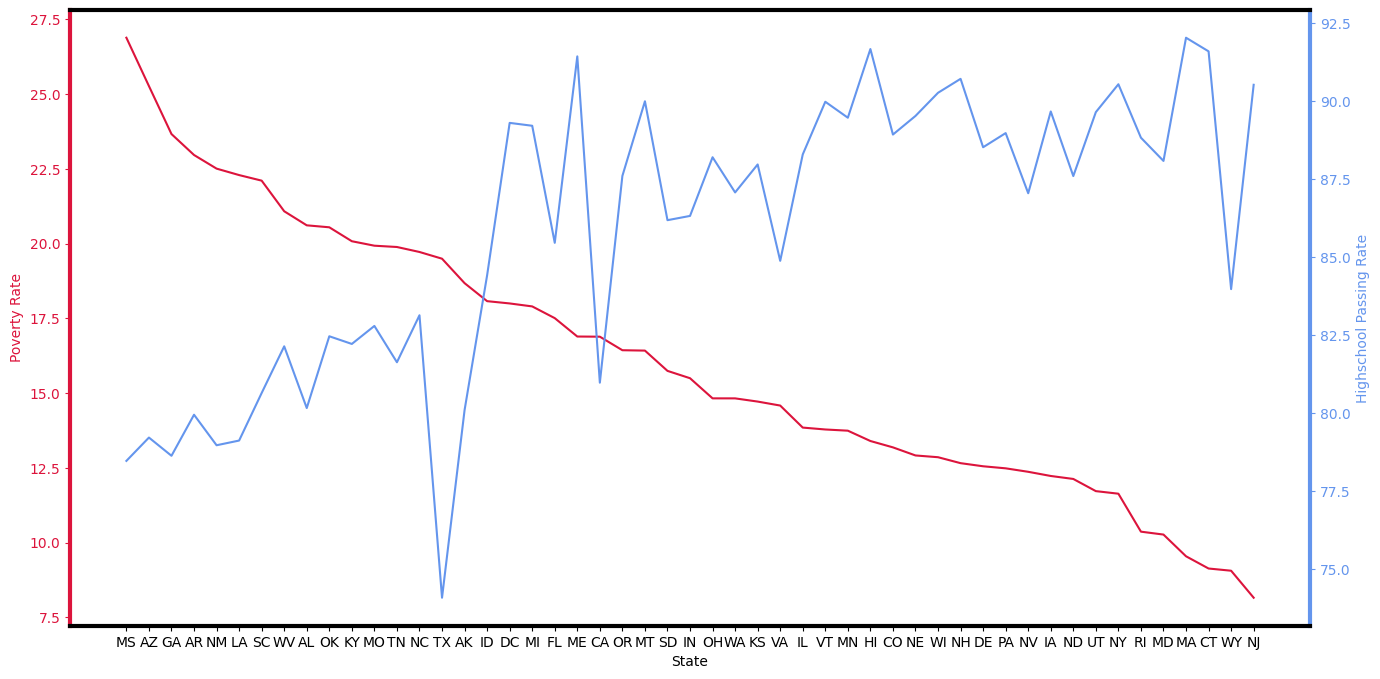

In [13]:
fig,ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(poverty_dataframe['States'], poverty_dataframe['Poverty'], color='crimson')
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson', color='crimson')
ax2 = ax1.twinx()
ax2.plot(poverty_dataframe['States'], poverty_dataframe['Highschool'], color='cornflowerblue')
ax2.set_xlabel('State')
ax2.set_ylabel('Highschool Passing Rate', color='cornflowerblue')
ax2.tick_params(axis='y', labelcolor='cornflowerblue', color='cornflowerblue')
ax2.spines['left'].set_color('crimson')
ax2.spines['left'].set_linewidth(3)
ax2.spines['right'].set_color('cornflowerblue')
ax2.spines['right'].set_linewidth(3)
ax2.spines['top'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)

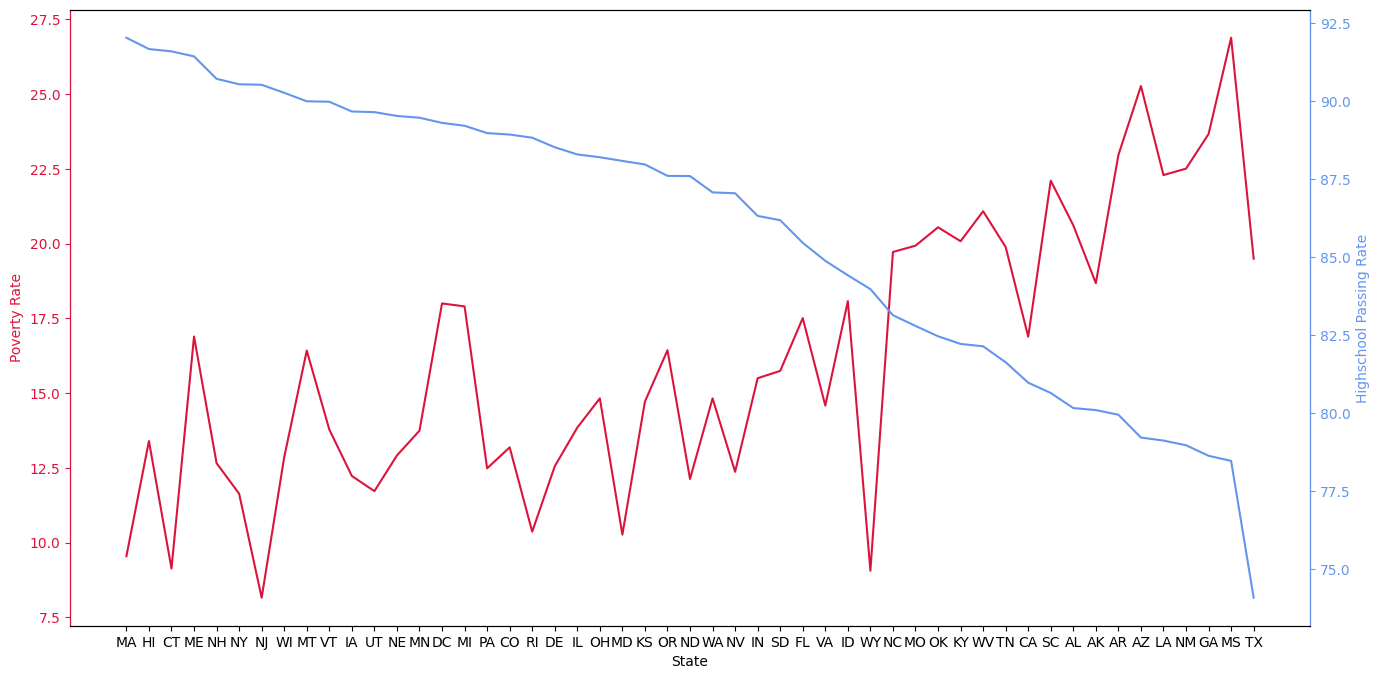

In [14]:
fig,ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(poverty_dataframe2['States'], poverty_dataframe2['Poverty'], color='crimson')
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson', color='crimson')
ax2 = ax1.twinx()
ax2.plot(poverty_dataframe2['States'], poverty_dataframe2['Highschool'], color='cornflowerblue')
ax2.set_xlabel('State')
ax2.set_ylabel('Highschool Passing Rate', color='cornflowerblue')
ax2.tick_params(axis='y', labelcolor='cornflowerblue', color='cornflowerblue')
ax2.spines['left'].set_color('crimson')
ax2.spines['right'].set_color('cornflowerblue')

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

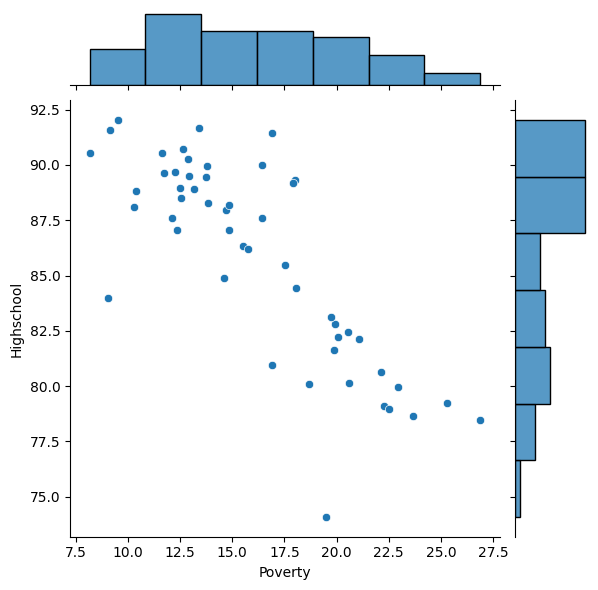

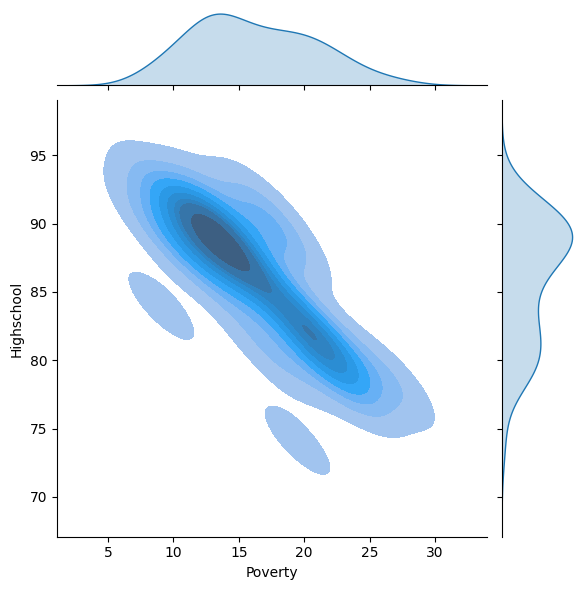

In [15]:
poverty_rates = []
states = []
for bruh,data in df_pct_poverty.iterrows():
    try:
        poverty_rates.append(float(data['Poverty_Rates']))
        states.append(data['Geographic Area'])
    except:
        poverty_rates.append(0)
        states.append(data['Geographic Area'])
data = {'Poverty': poverty_rates, "States": states}
poverty_dataframe = pd.DataFrame(data, columns=['Poverty', 'States'])
poverty_dataframe = poverty_dataframe.groupby(['States']).mean().reset_index()
# poverty_dataframe  = poverty_dataframe.sort_values('Poverty', ascending=False)
highschool_rates = []
states = []
for bruh,data in df_pct_completed_hs.iterrows():
    try:
        highschool_rates.append(float(data['percent_completed_hs']))
        states.append(data['Geographic Area'])
    except:
        highschool_rates.append(0)
        states.append(data['Geographic Area'])
data = {'Highschool': highschool_rates, "States": states}
highschool_dataframe = pd.DataFrame(data, columns=['Highschool', 'States'])
highschool_dataframe = highschool_dataframe.groupby(['States']).mean().reset_index()
# highschool_dataframe  = highschool_dataframe.sort_values('Highschool', ascending=False)
sns.jointplot(x=poverty_dataframe['Poverty'], y=highschool_dataframe['Highschool'], data=poverty_dataframe, kind='scatter')
sns.jointplot(x=poverty_dataframe['Poverty'], y=highschool_dataframe['Highschool'], data=poverty_dataframe, kind='kde', fill=True)

Text(0.5, 1.0, 'Average Highschool Passing Rate By State')

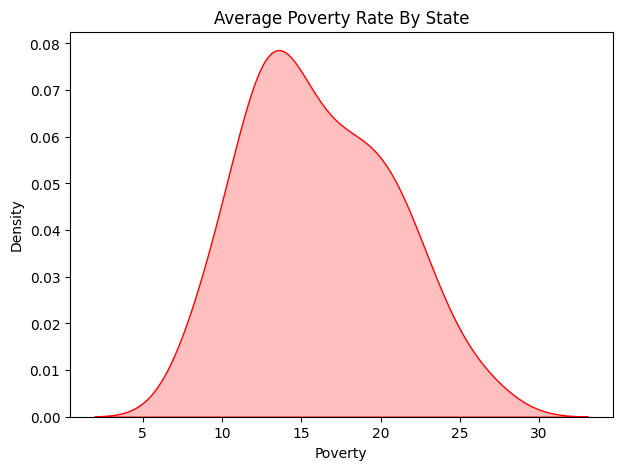

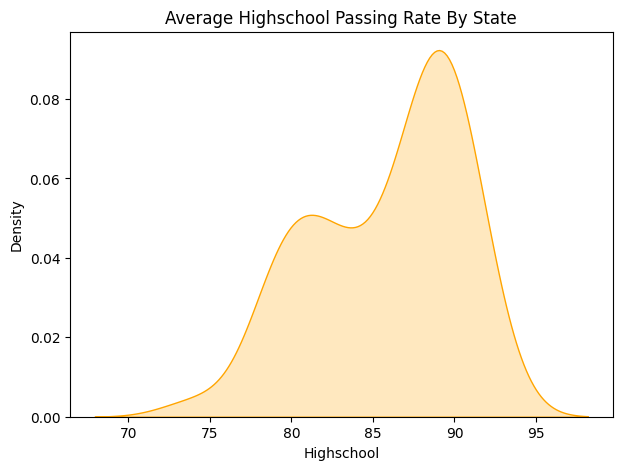

In [16]:
plt.figure(figsize=(7,5))
sns.kdeplot(poverty_dataframe['Poverty'], fill=True, color='red')
plt.title('Average Poverty Rate By State')
plt.figure(figsize=(7,5))
sns.kdeplot(highschool_dataframe['Highschool'], fill=True, color='orange')
plt.title('Average Highschool Passing Rate By State')


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

c:\Users\veerp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



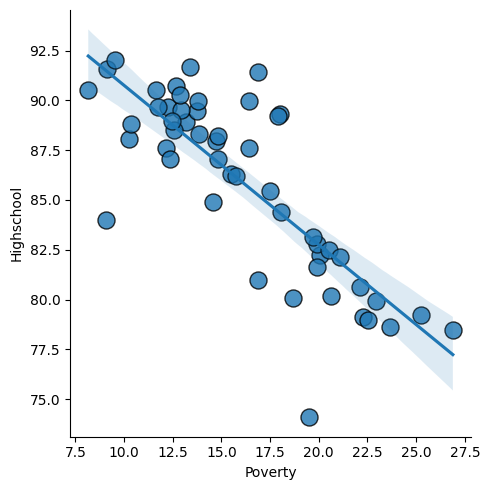

In [17]:
data = {'Poverty': poverty_dataframe['Poverty'], 'Highschool': highschool_dataframe['Highschool']}
dataframe = pd.DataFrame(data, columns=['Poverty', 'Highschool'])
sns.lmplot(x='Poverty', y='Highschool', data=dataframe, scatter_kws={'s': 150, 'edgecolor': 'black'})

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [18]:
poverty_rates = []
states = []
shares = []
for bruh,data in df_share_race_city.iterrows():
    try:
        poverty_rates.append(float(data['share_white']))
        shares.append('White')
        states.append(data['Geographic Area'])
        poverty_rates.append(float(data['share_black']))
        shares.append('Black')
        states.append(data['Geographic Area'])
        poverty_rates.append(float(data['share_native_american']))
        shares.append('Native American')
        states.append(data['Geographic Area'])
        poverty_rates.append(float(data['share_asian']))
        shares.append('Asian')
        states.append(data['Geographic Area'])
        poverty_rates.append(float(data['share_hispanic']))
        shares.append('Hispanic')
        states.append(data['Geographic Area'])
    except:
        poverty_rates.append(20)
        poverty_rates.append(1)
        poverty_rates.append(9)
        poverty_rates.append(67)
        poverty_rates.append(3)
        states.append(data['Geographic Area'])
        states.append(data['Geographic Area'])
        states.append(data['Geographic Area'])
        states.append(data['Geographic Area'])
        states.append(data['Geographic Area'])
        shares.append('White')
        shares.append('Black')
        shares.append('Native American')
        shares.append('Asian')
        shares.append('Hispanic')

data = {"States": states, 'Shares': shares, 'Rates': poverty_rates}
poverty_dataframe = pd.DataFrame(data, columns=['States', 'Shares', 'Rates'])
poverty_dataframe = poverty_dataframe.groupby(['States', 'Shares']).mean().reset_index()
poverty_dataframe

,States,Shares,Rates
0,AK,Asian,1.94
1,AK,Black,0.57
2,AK,Hispanic,2.16
3,AK,Native American,45.55
4,AK,White,45.43
...,...,...,...
250,WY,Asian,0.72
251,WY,Black,0.40
252,WY,Hispanic,6.00
253,WY,Native American,3.12


In [19]:
bar = px.bar(x=poverty_dataframe['States'], y=poverty_dataframe['Rates'], color=poverty_dataframe['Shares'],title='Share of Race in US States')
bar['layout']['title']['font'] = dict(color='#0096FF')
bar.update_layout(xaxis_title='State', yaxis_title='Percentage by Race', font_size=10, title_x=0.5)

# Create Pie Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [20]:
race = []
num_people_killed = []
for bruh,data in df_fatalities['race'].value_counts().to_frame().reset_index().iterrows():
    if data['race'] == 'W':
        race.append('White')
    elif data['race'] == 'B':
        race.append('Black')
    elif data['race'] == 'H':
        race.append('Hispanic')
    elif data['race'] == 'A':
        race.append('Asian')
    elif data['race'] == 'N':
        race.append('Native American')
    elif data['race'] == 'O':
        race.append('Other')
    num_people_killed.append(data['count'])
data = {'Race': race, 'Num of people killed': num_people_killed}
dataframe = pd.DataFrame(data, columns=['Race', 'Num of people killed'])
dataframe

,Race,Num of people killed
0,White,1201
1,Black,618
2,Hispanic,423
3,Asian,39
4,Native American,31
5,Other,28


In [21]:
px.pie(labels=dataframe['Race'], values=dataframe['Num of people killed'],title='Number of People Killed by Race',names=dataframe['Race']).update_traces().update_layout(title_x=0.5).show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [22]:
race = []
num_people_killed = []
for bruh,data in df_fatalities['gender'].value_counts().to_frame().reset_index().iterrows():
    if data['gender'] == 'F':
        race.append('Female')
        num_people_killed.append(data['count'])
    elif data['gender'] == 'M':
        race.append('Men')
        num_people_killed.append(data['count'])
print(len(race))
print(len(num_people_killed))
data = {'Race': race, 'Num of people killed': num_people_killed}
dataframe = pd.DataFrame(data, columns=['Race', 'Num of people killed'])
dataframe

2
2


,Race,Num of people killed
0,Men,2428
1,Female,107


In [23]:
px.pie(labels=dataframe['Race'], values=dataframe['Num of people killed'],title='Number of People Killed by Gender',names=dataframe['Race']).update_traces().update_layout(title_x=0.5).show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [24]:
box = px.box(df_fatalities, x='gender', y='age', color='manner_of_death', title='Age and Manner of Death by Gender')
box.update_layout(xaxis_title='Gender',yaxis_title='Age').update_layout(title_x=0.5, width=1000)
box['layout']['title']['font'] = dict(color='#0096FF')
box.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [25]:
weapons = df_fatalities['armed'].value_counts().to_frame().reset_index()
weapons

,armed,count
0,gun,1398
1,knife,373
2,vehicle,177
3,unarmed,171
4,undetermined,117
...,...,...
63,hand torch,1
64,garden tool,1
65,pole,1
66,pick-axe,1


In [26]:
# px.bar(x=weapons['armed'], y=weapons['count'], color=weapons['armed'])
# px.pie(labels=weapons['armed'], values=weapons['count'], names=weapons['armed'])
fig = px.sunburst(weapons, path=['count', 'armed'], title='Sunburst Chart: Number Of Times Weapon Used(Inner Circle) / Types of Weapons(Outer Circle)').update_layout(title_x=0.5, width=1000)
fig['layout']['title']['font'] = dict(color='#0096FF')
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [27]:
under_25 = []
for bruh,data in df_fatalities.dropna().iterrows():
    if data['age'] < 25:
        under_25.append('Under 25')
    else:
        under_25.append('Over 25')
under_over_dataframe = pd.Series(under_25).value_counts().to_frame().reset_index()
under_over_dataframe
px.pie(labels=under_over_dataframe['index'], values=under_over_dataframe['count'], names=under_over_dataframe['index'], title='Under 25/Over 25 Ratio of Police Killings').update_traces().update_layout(title_x=0.5).show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

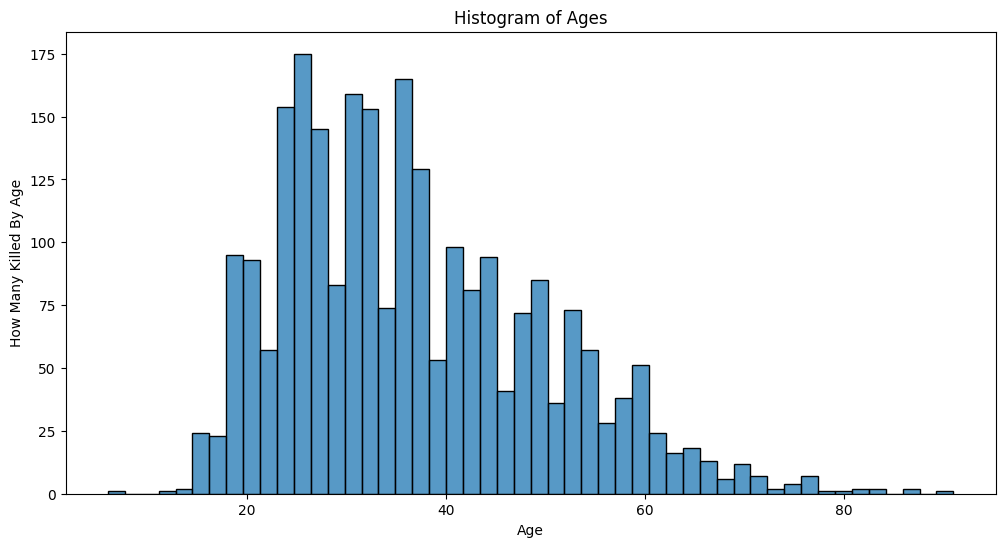

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_fatalities['age'], x=df_fatalities['age'], bins=50)
plt.xlabel('Age')
plt.ylabel('How Many Killed By Age')
plt.title('Histogram of Ages')
plt.show()

<Axes: xlabel='age', ylabel='Density'>

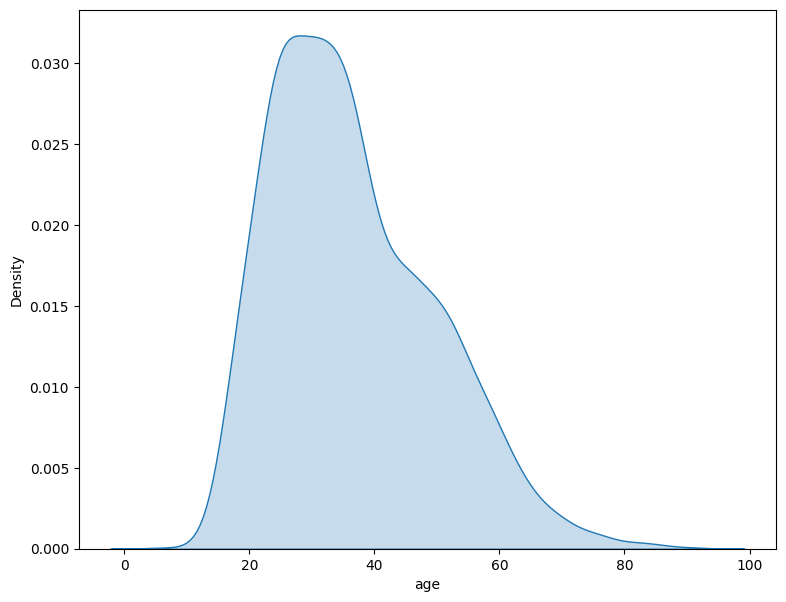

In [29]:
plt.figure(figsize=(9,7))

sns.kdeplot(df_fatalities['age'], fill=True)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

Text(0.5, 1.0, 'KDE(Kernel Density Estimate) for Ages for Other Races in Police Killings')

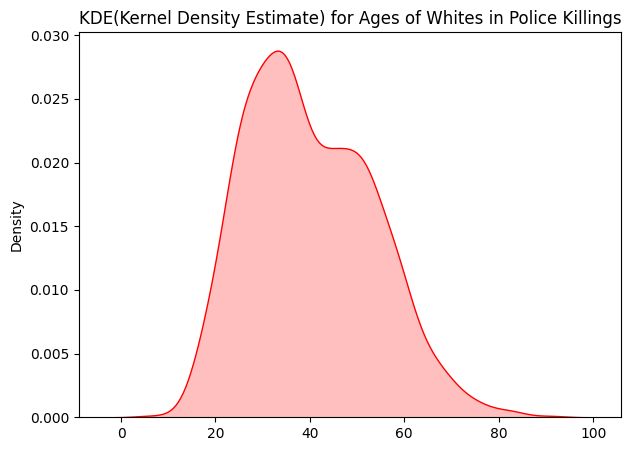

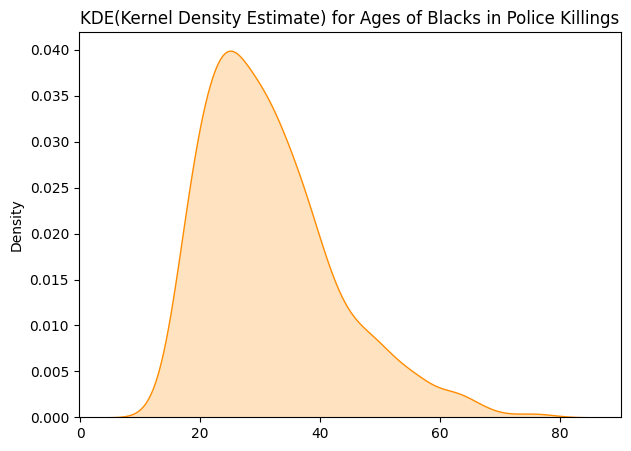

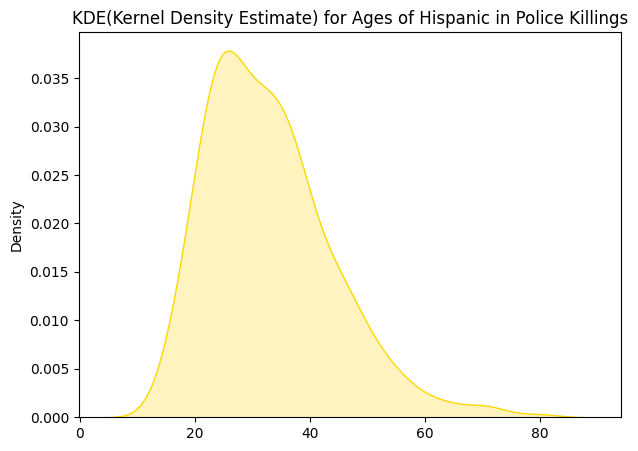

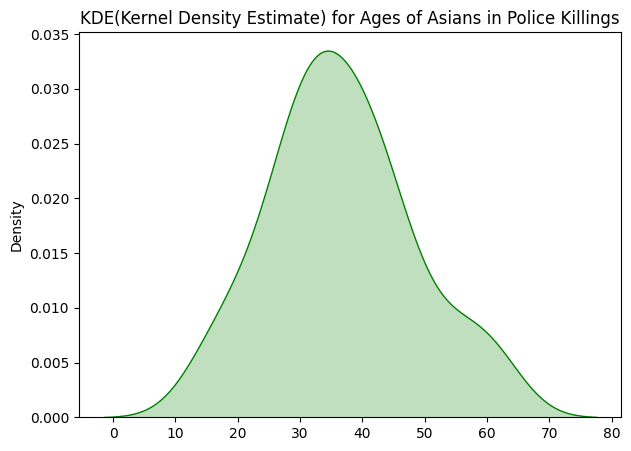

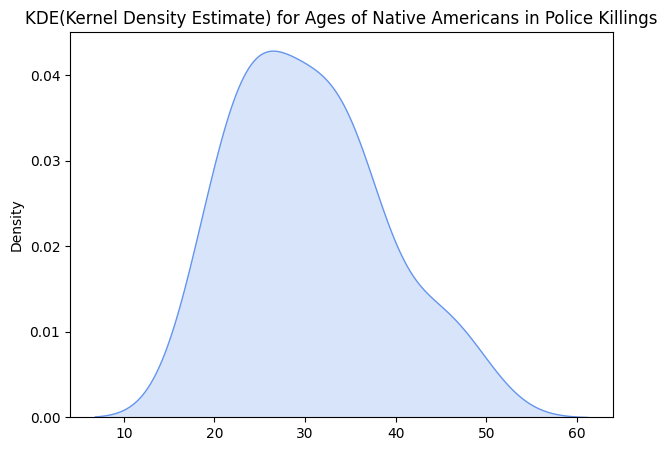

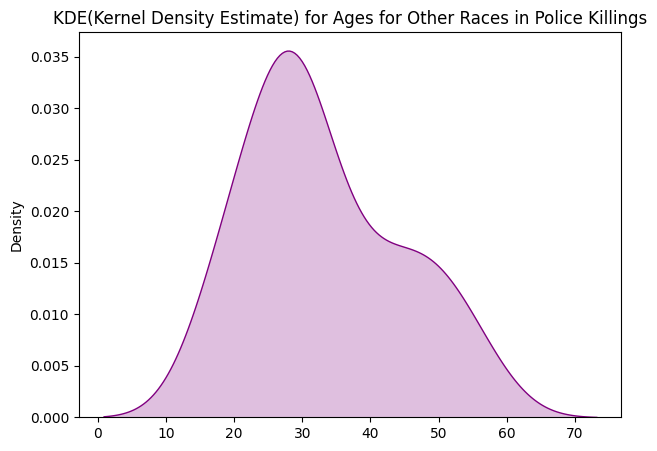

In [30]:
white_race_ages = []
black_race_ages = []
hispanic_race_ages = []
asian_race_ages = []
native_race_ages = []
other_race_ages = []
for bruh,data in df_fatalities.iterrows():
    if data['race'] == 'W':
        white_race_ages.append(data['age'])
    elif data['race'] == 'B':
        black_race_ages.append(data['age'])
    elif data['race'] == 'H':
        hispanic_race_ages.append(data['age'])
    elif data['race'] == 'A':
        asian_race_ages.append(data['age'])
    elif data['race'] == 'N':
        native_race_ages.append(data['age'])
    elif data['race'] == 'O':
        other_race_ages.append(data['age'])

plt.figure(figsize=(7,5))
sns.kdeplot(white_race_ages, fill=True, color='red')
plt.title('KDE(Kernel Density Estimate) for Ages of Whites in Police Killings')
plt.figure(figsize=(7,5))
sns.kdeplot(black_race_ages, fill=True, color='darkorange')
plt.title('KDE(Kernel Density Estimate) for Ages of Blacks in Police Killings')
plt.figure(figsize=(7,5))
sns.kdeplot(hispanic_race_ages, fill=True, color='gold')
plt.title('KDE(Kernel Density Estimate) for Ages of Hispanic in Police Killings')
plt.figure(figsize=(7,5))
sns.kdeplot(asian_race_ages, fill=True, color='green')
plt.title('KDE(Kernel Density Estimate) for Ages of Asians in Police Killings')
plt.figure(figsize=(7,5))
sns.kdeplot(native_race_ages, fill=True, color='cornflowerblue')
plt.title('KDE(Kernel Density Estimate) for Ages of Native Americans in Police Killings')
plt.figure(figsize=(7,5))
sns.kdeplot(other_race_ages, fill=True, color='purple')
plt.title('KDE(Kernel Density Estimate) for Ages for Other Races in Police Killings')
#Order: First KDE Plot for Whites, then Blacks, then Hispanic, Asian, Native American, and lastly other races

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [31]:
killings = []
for bruh,data in df_fatalities.iterrows():
    if data['race'] == 'W':
        killings.append("White")
    elif data['race'] == 'B':
        killings.append('Black')
    elif data['race'] == 'H':
        killings.append("Hispanic")
    elif data['race'] == 'A':
        killings.append('Asian')
    elif data['race'] == 'N':
        killings.append("Native American")
    elif data['race'] == 'O':
        killings.append('Other')
killings = pd.Series(killings).value_counts().to_frame().reset_index()
killings

,index,count
0,White,1201
1,Black,618
2,Hispanic,423
3,Asian,39
4,Native American,31
5,Other,28


In [32]:
bar = px.bar(x=killings['index'], y=killings['count'], color=killings['count'], color_continuous_scale='ylgnbu')
bar.update_layout(xaxis_title='Race', yaxis_title='Number of killings by race', font_size=10.5)
bar.update_xaxes(tickangle=0)
bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [33]:
SOMI = []
for bruh,data in df_fatalities.iterrows():
    SOMI.append(data['signs_of_mental_illness'])
SOMI = pd.Series(SOMI).value_counts().to_frame().reset_index()
SOMI

,index,count
0,False,1902
1,True,633


In [34]:
px.pie(labels=SOMI['index'], values=SOMI['count'], names=SOMI['index'], title='What Percentage of People had a Mental Illness When Killed').update_traces().update_layout(title_x=0.5).show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [35]:
TTC = []
for bruh,data in df_fatalities.iterrows():
    TTC.append(data['city'])
TTC2 = TTC #USEFUL FOR LATER
TTC = pd.Series(TTC).value_counts().to_frame().reset_index()
TTC = TTC[:10]
TTC
#TTC(Top Ten Cities)

,index,count
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


In [36]:
bar = px.bar(x=TTC['index'], y=TTC['count'], color=TTC['count'], color_continuous_scale='ylgnbu')
bar.update_layout(xaxis_title='City', yaxis_title='Killings per City', font_size=10.5)
bar.update_xaxes(tickangle=0)
bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [37]:
TTC = []
race = []
for bruh,data in df_fatalities.iterrows():
    if data['city'] in ['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas', 'San Antonio', 'Columbus', 'Austin', 'Miami', 'St. Louis']:
        if data['race'] == 'W':
            race.append("White")
            TTC.append(data['city'])
        elif data['race'] == 'B':
            race.append('Black')
            TTC.append(data['city'])
        elif data['race'] == 'H':
            race.append("Hispanic")
            TTC.append(data['city'])
        elif data['race'] == 'A':
            race.append('Asian')
            TTC.append(data['city'])
        elif data['race'] == 'N':
            race.append("Native American")
            TTC.append(data['city'])
        elif data['race'] == 'O':
            race.append('Other')
            TTC.append(data['city'])
# SOMI = pd.Series(SOMI).value_counts().to_frame().reset_index()
# SOMI = SOMI[:10]
# SOMI
data = {'Top ten Cities': TTC, 'Race': race}
dataframe = pd.DataFrame(data, columns=['Top ten Cities', 'Race'])
dataframe = dataframe.value_counts().to_frame().reset_index().sort_values(by='Top ten Cities')
dataframe

,Top ten Cities,Race,count
25,Austin,Hispanic,2
3,Austin,White,13
21,Austin,Black,3
0,Chicago,Black,21
27,Chicago,White,2
32,Chicago,Hispanic,1
7,Columbus,Black,11
14,Columbus,White,6
31,Columbus,Other,1
30,Houston,Asian,1


In [38]:
bar = px.bar(x=dataframe['Top ten Cities'], y=dataframe['count'], color=dataframe['Race'],title='Share of Killings by Race')
bar['layout']['title']['font'] = dict(color='#0096FF')
bar.update_layout(xaxis_title = 'Cities', yaxis_title = 'Number of Killings', font_size=10, title_x=0.5)

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [39]:
states = []
for bruh,data in df_fatalities.iterrows():
    states.append(data['state'])
states = pd.Series(states).value_counts().to_frame().reset_index().sort_values('index')
states

,index,count
36,AK,15
16,AL,50
30,AR,26
3,AZ,118
0,CA,424
6,CO,74
44,CT,9
42,DC,11
45,DE,8
2,FL,154


In [40]:
px.choropleth(states, locations='index', color='count', color_continuous_scale='tropic', scope="usa",locationmode='USA-states').update_layout(margin=dict(l=20, r=20, t=5, b=5),width=700, height=350, title_text='Killings by State', title_x=0.45, title_y=0.99)

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [41]:
dates = []
for bruh,data in df_fatalities.iterrows():
    date = '20' + data['date'].split('/')[2]
    dates.append(date)
dates = pd.Series(dates).value_counts().to_frame().reset_index()
dates

,index,count
0,2015,991
1,2016,963
2,2017,581


In [42]:
bar = px.bar(x=dates['index'], y=dates['count'], color=dates['count'], color_continuous_scale='tealrose')
bar.update_layout(xaxis_title='Year', yaxis_title='Killings per Year', font_size=10.5)
bar.update_xaxes(tickangle=0)
bar.show()

In [43]:
bar = px.pie(labels=dates['index'], values=dates['count'], names=dates['index'])
bar.update_layout(xaxis_title='Year', yaxis_title='Killings per Year', font_size=10.5)
bar.update_xaxes(tickangle=0)
bar.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).